# Histograma

O histograma ou distribuição de fequencia, de forma bem grosseira é uma representação grafica da proporção dos dados em frenquencia em que esses dados aparecem no conjunto definidos por uma quantidade de classes.

## Utilização na Visão Computacional
Para a visão computacional o histograma é amplamente utiilzado para estudo do comportamento e frequencias de caracteristicas de imagens como cores, iluminação, saturação, matiz e outras características. Pois através do conhecimento deste comportamento é possível fazer melhororias e correções ou conhecimento de padrões das imagens.

In [1]:
import cv2
import numpy as np

from matplotlib import pyplot as plt
from matplotlib import image as mpimg

In [1]:
img = cv2.imread('assets/flor.jpg')
imgplot = plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

NameError: name 'cv2' is not defined

## Histograma de Cores
O primeiro histograma a ser visto é o de cores. Em uma imagem RGB(ou BGR, para o OpenCV) cada canal representa a quantidade de cor em um determinado pixel, assim podemos ver a distribuição de cada cor e a frequencia em que os difetentes tons de uma determinada cor está presente na imagem

Histograma da imagem em preto e branco


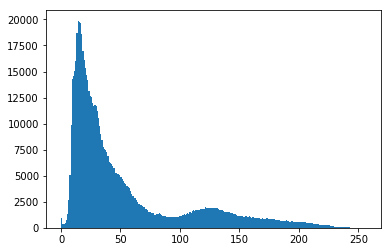

In [15]:
print('Histograma da imagem em preto e branco')
plt.hist(img.ravel(),256,[0,256]);plt.show()

### Função histograma OpenCV
**cv2.calcHist(imagem, canais, máscara, tamanho_histograma, ranges[,histograma[,acumulo]])**
+ imagem:
+ canais:
+ máscara:
+ tamanho_histograma:
+ ranges:

In [14]:
# Cálculo do Histograma
histograma = cv2.calcHist([img],[0],None,[256],[0,256])

Histograma e distribuição de Cores


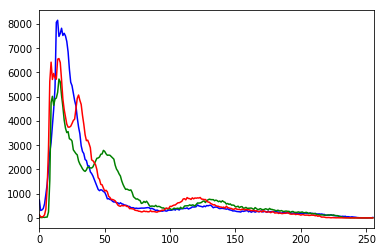

In [13]:
print('Histograma e distribuição de Cores')
cores = ('b','g','r')

for i, col in enumerate(cores):
    histograma = cv2.calcHist([img],[i],None,[256],[0,256])
    plt.plot(histograma,color = col)
    plt.xlim([0,256])
plt.show()

Análise da distribuição por partes da imagem
Plotagem da imagem e seu corte


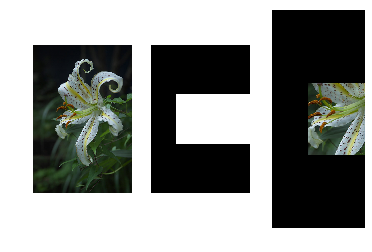

Estudo do comportamento de cada canal separadamente
Canal B


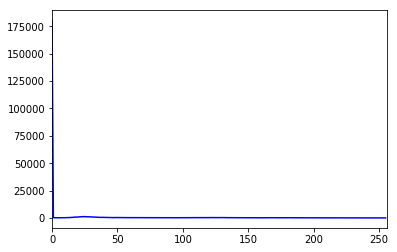

Canal G


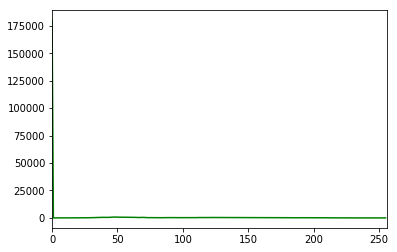

Canal R


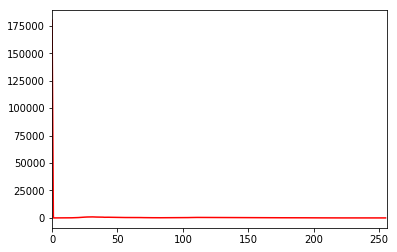

In [20]:
print('Análise da distribuição por partes da imagem')

mask = np.zeros(img.shape[:2], np.uint8)
mask[200:400, 100:900] = 255
# mask[:, :] = 255
masked_img = cv2.bitwise_and(img,img,mask = mask)

hist_mask = cv2.calcHist([img],[0],mask,[256],[0,256])
    
print('Plotagem da imagem e seu corte')
plt.subplot(131), plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB)),plt.axis('off')
plt.subplot(132), plt.imshow(mask,'gray'),plt.axis('off')
plt.subplot(133), plt.imshow(cv2.cvtColor(masked_img,cv2.COLOR_BGR2RGB)),plt.axis('off')
plt.xlim([0,256])
plt.show()

print('Estudo do comportamento de cada canal separadamente')
cores = ('b','g','r')
for i, col in enumerate(cores):
    print('Canal',col.upper())
    histograma = cv2.calcHist([masked_img],[i],None,[256],[0,256])
    plt.plot(histograma,color = col)
    plt.xlim([0,256])
    plt.show()

## Histograma de Luminosidade
O Histogramas de Luminosidade é uma analise da luminosidade, quantidade de brilho na imagem e para isso convertemos a imagem para do modelo RGB(BGR no OpenCV) para HSL(HLS no OpenCV) e então vemos o comportamento do canal L - Lightness - Luminosidade.
### HSL

|Canal|Val min|Val Max|
|---|---|---|
|Hue - H| 0 | 179|
|Saturation - S| 0 | 255|
|Lightness - L| 0 | 255|

In [1]:
print('Imagem Original')
img = cv2.imread('assets/flor.jpg')
imgplot = plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

print('Histograma Original')
histograma = cv2.calcHist([img],[0],None,[256],[0,256])
cores = ('b','g','r')
for i, col in enumerate(cores):
    histograma = cv2.calcHist([img],[i],None,[256],[0,256])
    plt.plot(histograma,color = col)
    plt.xlim([0,256])
plt.show()

print('Histograma de Luminosidade')
imgHLS = cv2.cvtColor(img, cv2.COLOR_BGR2HLS)
H,L,S = cv2.split(imgHLS)

histograma = cv2.calcHist([L],[0],None,[256],[0,256])
plt.plot(histograma,color = 'gray')
plt.xlim([0,256])
plt.show()


Imagem Original


NameError: name 'cv2' is not defined

Mudanças na Luminosidade


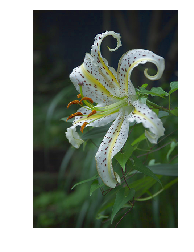

Comportamento da mudança da Luminosidade


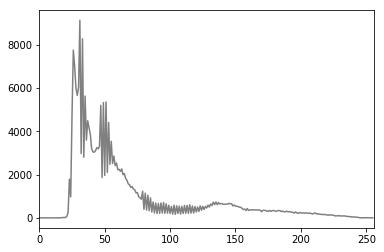

In [23]:
print('Mudanças na Luminosidade')
imgHLS = cv2.merge([H,L+15,S])
imgplot = plt.imshow(cv2.cvtColor(imgHLS,cv2.COLOR_HLS2RGB))
plt.axis('off')
plt.show()

print('Comportamento da mudança da Luminosidade')
H,L,S = cv2.split(imgHLS)

histograma = cv2.calcHist([L],[0],None,[256],[0,256])
plt.plot(histograma,color = 'gray')
plt.xlim([0,256])
plt.show()

## Referência

[\[1\] - Hisour: MODELO DE CORES HSL E HSV ](https://www.hisour.com/pt/hsl-and-hsv-24344/)

[\[2\] - Stackoverlow: How do you lightness thresh hold with HSL on OpenCV? ](https://stackoverflow.com/questions/48182791/how-do-you-lightness-thresh-hold-with-hsl-on-opencv)

[\[3\] - OpenCV: Histograms - 1 : Find, Plot, Analyze !!! ](https://docs.opencv.org/3.1.0/d1/db7/tutorial_py_histogram_begins.html)

[\[4\] - OpenCV: Histograms - 2: Histogram Equalization ](https://docs.opencv.org/3.1.0/d5/daf/tutorial_py_histogram_equalization.html)

[\[5\] - Cambridge in Colours: HISTOGRAMAS - LUMINÂNCIA E COR EM HISTOGRAMAS ](https://www.cambridgeincolour.com/pt-br/tutoriais/histograms2.htm)